<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/Project%206/Project_6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Hassell

In [4]:
library(readr)

loans_training <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv")
loans_test <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv")

In [2]:
summary(loans_test)

  Approval       Debt.to.Income.Ratio   FICO.Score    Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  

In [3]:
summary(loans_training)

  Approval       Debt.to.Income.Ratio   FICO.Score  Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

#1. Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

In order to create a CART model, we need to import the necessary libraries.

In [5]:
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



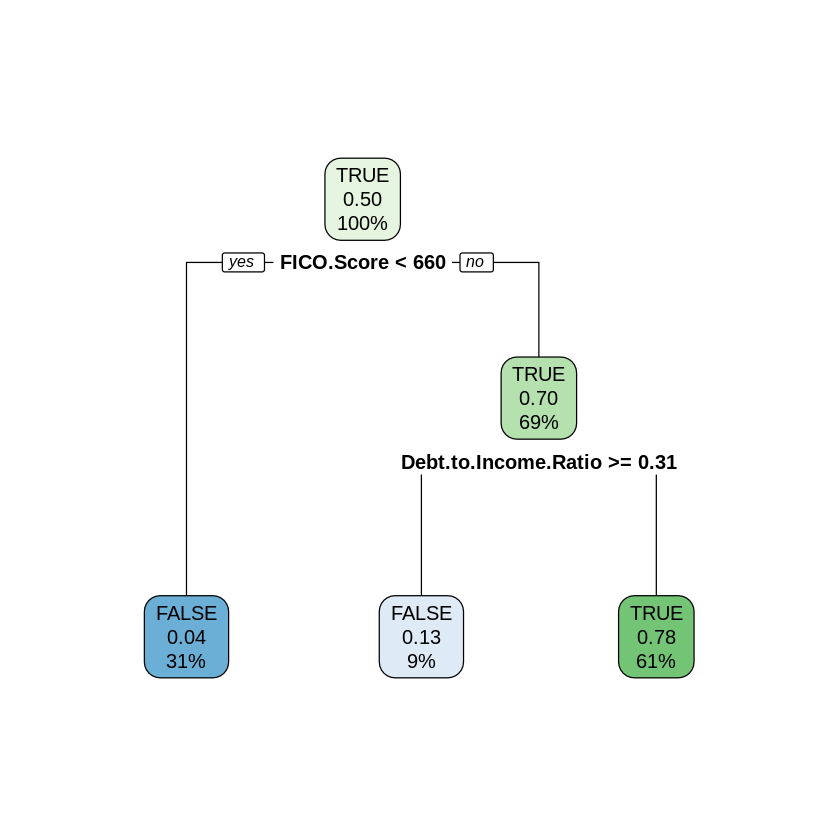

In [21]:
loans_training$Approval <- factor(loans_training$Approval)
# create the model
cart_model <- rpart(Approval ~ `Debt.to.Income.Ratio` + `FICO.Score` + `Request.Amount` + Interest, data = loans_training)
# plot it
rpart.plot(cart_model)

This plot tells us that if someone's credit score is under 660, they will be unable to recieve a loan. If their credit score and debt to income ratio is less than .31, they also will be unable to recieve the loan. Only if their credit score is >660 and debt to income ratio is >=.31 will they be able to recieve a loan.

In [22]:
summary(cart_model)

Call:
rpart(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score + 
    Request.Amount + Interest, data = loans_training)
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0025311 0.002582312
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3090480 0.001865894

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to the right, impro

#2. Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [2]:
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘partykit’




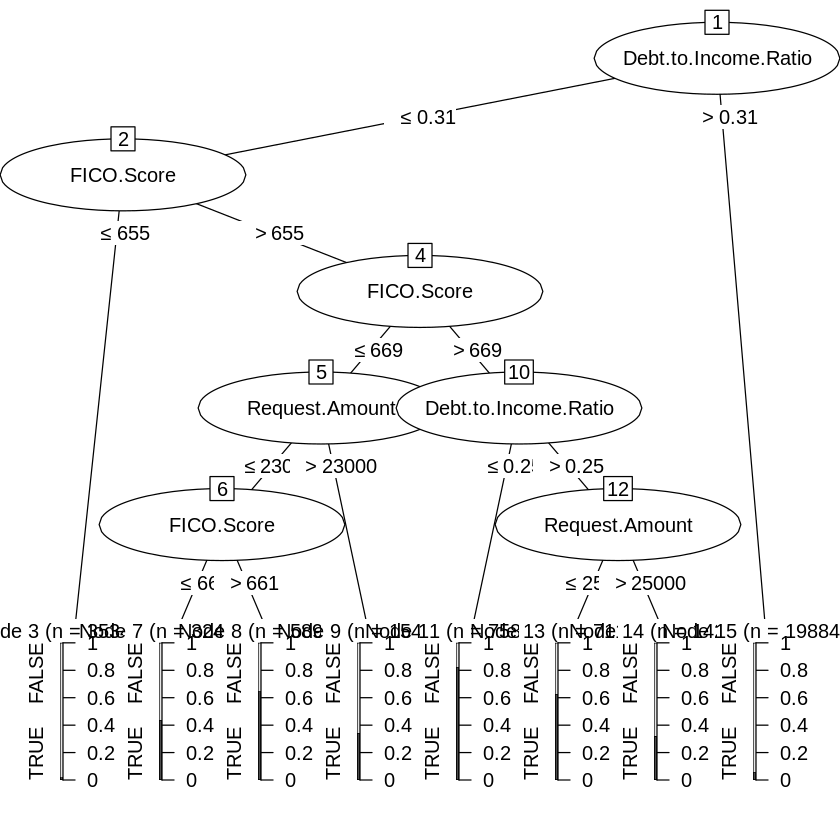

In [20]:
loans_training$Approval <- factor(loans_training$Approval)
# create c5 model
c5_model <- C5.0(Approval ~ `Debt.to.Income.Ratio` + `FICO.Score` + `Request.Amount` + Interest, data = loans_training, control = C5.0Control(noGlobalPruning = FALSE, minCases = 1000))
plot(c5_model)

This model, instead of starting with FICO as the root, starts with debt to income ratio as the root. This graph also has different FICO numbers than the CART model. It is also much harder to read and has many more leaf nodes.

In [23]:
summary(c5_model)


Call:
C5.0.formula(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score
 + Request.Amount + Interest, data = loans_training, control
 = C5.0Control(noGlobalPruning = FALSE, minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 12 04:09:54 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/45

#Model Comparison

The C5 model had much more leaf nodes than the CART model did. The C5 model seems to be overfit with it's data, and is also much harder to read than the much more simpler CART model.

#Summary

Here is the performance of my models.

In [19]:
loans_test$Approval <- factor(loans_test$Approval)
# cart predictions
predictions <- predict(cart_model, newdata = loans_test, type = "class")

# compute accuracy
actual_values <- loans_test$Approval
accuracy <- mean(predictions == actual_values)
cat("CART Accuracy:", accuracy, "\n")

# c5 predictions
predictions <- predict(c5_model, newdata = loans_test, type = "class")

# compute accuracy
actual_values <- loans_test$Approval
accuracy <- mean(predictions == actual_values)
cat("C5 Accuracy:", accuracy)

CART Accuracy: 0.8432331 
C5 Accuracy: 0.8471568

From this we can determine that C5 is a better option in terms of accuracy between these two models, however, it is much harder to read. The CART model is quite straightforward and the difference between their accuracies is less than a tenth of a percent, so I personally would go with the CART model.